Machine Learning Steps:
1. Define Objective.
2. Data Gathering.
3. Data Exploration.
4. Preparing Data.
5. Building a model.
6. Model Evaluation.
7. Prediction.

###################################################################################################################

Phase 1 -- Define Objective.

###################################################################################################################


To build a model which can predict the habitability index of a planet using various parameters like P_RADIUS , S_RADIUS , S_DISTANCE , S_RADIUS , P_PERIOD etc.

The input dataset is a csv file which contains the various parameters for a particular planet which is estimated by satellite or telescopic data.

The data is further compiled by scientists in NASA to create a ultimate dataset which provides the habitability index.

The dataset is downloaded from subbranch of NASA EXOPLANET ARCHIVES (https://exoplanetarchive.ipac.caltech.edu)


###################################################################################################################

Phase 2 -- Data Gathering

###################################################################################################################

In [1]:
#importing essential libraries for Data Gathering
import pandas as pd

In [2]:
intialData = pd.read_csv('phl_exoplanetCatalog.csv')
intialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [3]:
intialData.head() #.head() displays the first five entries

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


###################################################################################################################


Phase 3 -- Data Exploration (Data Analysis)

###################################################################################################################

In [4]:
#importing essential libraries for Data Analysis

import matplotlib.pyplot as plt
import numpy as np
import warnings

In [5]:
#Since Habitability Index is our required parameter let's analyze the distribution of the Habitability Index

intialData['P_HABITABLE'].value_counts()

0    3993
2      34
1      21
Name: P_HABITABLE, dtype: int64

In [6]:
#We normalize the values to find the each value contribution for habitability
intialData['P_HABITABLE'].value_counts(normalize=True)


0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

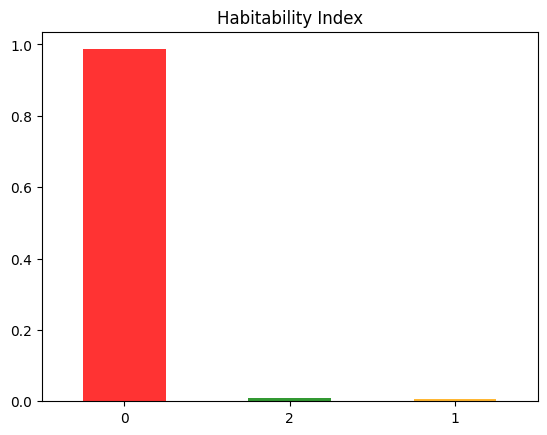

In [7]:
intialData.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['red','green','orange'], alpha = 0.8, rot=0)
plt.title('Habitability Index')
plt.show()

In [8]:
HabitabilityIndexValue = intialData['P_HABITABLE'].value_counts(normalize=True)
HabitabilityIndexValuePercentage_asList = []

for i in range(len(HabitabilityIndexValue)):
    print(i , " => ", HabitabilityIndexValue[i]*100 , "%")
    HabitabilityIndexValuePercentage_asList.append(HabitabilityIndexValue[i]*100)

0  =>  98.6413043478261 %
1  =>  0.5187747035573123 %
2  =>  0.8399209486166008 %


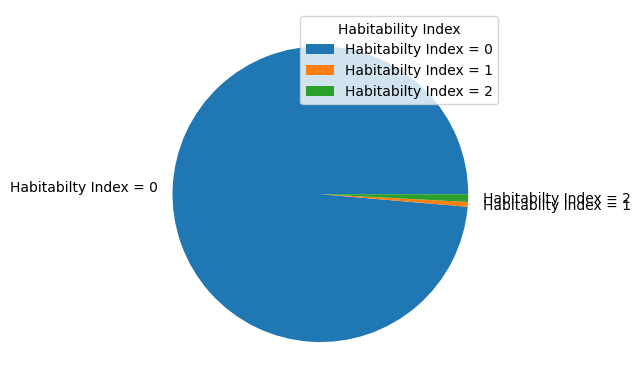

In [9]:
HabitabilityIndexValuePercentage_asNumpyArray = np.array(HabitabilityIndexValuePercentage_asList)
LablesForHabitabilityIndex = []
for i in range(len(HabitabilityIndexValuePercentage_asNumpyArray)):
    LablesForHabitabilityIndex.append("Habitabilty Index = "+str(i))
plt.pie(HabitabilityIndexValuePercentage_asNumpyArray , labels = LablesForHabitabilityIndex)
plt.legend(title = "Habitability Index")
plt.show()

From the Data analyzed above, we can state that 
1. Planets with Zero Life Expectancy (Habitability Index = 0) => 98.4%  [3993]
2. Planets with Minimum Life Expectancy (Habitability Index = 1) => 0.518% [21]
3. Planets with Maximum Life Expectancy (Habitability Index = 2) => 0.839% [34]

Resampling Data (OverSampling) using Sckit Module

In [10]:
#importing essential modules for preparing data

from sklearn.utils import resample

In [11]:
HabitabilityIndexValue0 = intialData[intialData.P_HABITABLE == 0]
HabitabilityIndexValue1 = intialData[intialData.P_HABITABLE == 1]
HabitabilityIndexValue2 = intialData[intialData.P_HABITABLE == 2]
HabitabilityIndexValue1_Oversampled = resample(HabitabilityIndexValue1, replace=True, n_samples=len(HabitabilityIndexValue0), random_state=12345)
oversampledData = pd.concat([HabitabilityIndexValue0, HabitabilityIndexValue1_Oversampled])
HabitabilityIndexValue2_Oversampled = resample(HabitabilityIndexValue2, replace=True, n_samples=len(HabitabilityIndexValue0), random_state=12345)
oversampledData = pd.concat([oversampledData, HabitabilityIndexValue2_Oversampled])

In [12]:
oversampledData['P_HABITABLE'].value_counts()

2    3993
1    3993
0    3993
Name: P_HABITABLE, dtype: int64

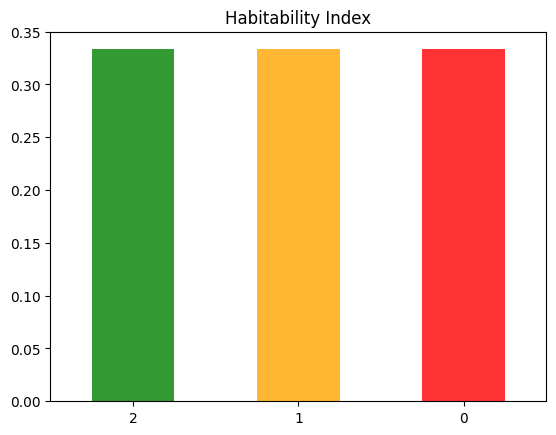

In [13]:
oversampledData.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['green','orange','red'], alpha = 0.8, rot=0)
plt.title('Habitability Index')
plt.show()

We can't deal with NULL values since they creates a lot of bias,

Since these values are predicted by the satellites/Telescopes/Observatories 
We can't get values for all parameters

So we need to eliminate some columns to make model train perfectly.


In [14]:
total = oversampledData.isnull().sum().sort_values(ascending=False)
totalNullData = oversampledData.isnull().sum()/oversampledData.isnull().count()
percent = (totalNullData).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent/100'])
missingData.head(50)


,Total,Percent/100
P_GEO_ALBEDO,11979,1.000000
P_DETECTION_MASS,11979,1.000000
P_DETECTION_RADIUS,11979,1.000000
P_ALT_NAMES,11979,1.000000
P_ATMOSPHERE,11979,1.000000
S_DISC,11979,1.000000
S_MAGNETIC_FIELD,11979,1.000000
P_TEMP_MEASURED,11469,0.957425
P_GEO_ALBEDO_ERROR_MIN,11469,0.957425
P_GEO_ALBEDO_ERROR_MAX,11469,0.957425


In [15]:
missingDataParamsList = []

missingDataValuePercentList = missingData.head(50).values.tolist()
DataParamsList = missingData.index.tolist()

for i in range(50):
    if(missingDataValuePercentList[i][1] >= 0.5):
        missingDataParamsList.append(DataParamsList[i])
    else:
        break

print("The parameters with more than 50% of missing data are:\n")
for eachParam in missingDataParamsList:
    print(eachParam)

The parameters with more than 50% of missing data are:

P_GEO_ALBEDO
P_DETECTION_MASS
P_DETECTION_RADIUS
P_ALT_NAMES
P_ATMOSPHERE
S_DISC
S_MAGNETIC_FIELD
P_TEMP_MEASURED
P_GEO_ALBEDO_ERROR_MIN
P_GEO_ALBEDO_ERROR_MAX
P_TPERI_ERROR_MAX
P_TPERI_ERROR_MIN
P_TPERI
P_DENSITY
P_ESCAPE
P_GRAVITY
P_POTENTIAL
P_OMEGA_ERROR_MAX
P_OMEGA_ERROR_MIN
P_OMEGA
P_INCLINATION_ERROR_MAX
P_INCLINATION_ERROR_MIN
P_INCLINATION
P_ECCENTRICITY_ERROR_MAX
P_ECCENTRICITY_ERROR_MIN
S_AGE_ERROR_MIN
S_AGE_ERROR_MAX
P_IMPACT_PARAMETER_ERROR_MIN
P_IMPACT_PARAMETER_ERROR_MAX
P_IMPACT_PARAMETER
P_MASS_ERROR_MAX
P_MASS_ERROR_MIN
P_HILL_SPHERE
P_MASS


Now these columns have more than 50% of null data so these parameters (columns) have to be excluded

In [16]:
nullPartialFreeData = oversampledData.drop(missingDataParamsList , axis=1)
nullPartialFreeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

Now we have eliminated columns with more than 50% null values 

We need to deal with remaining columns which has less than 50% null values

In [17]:
print(nullPartialFreeData.select_dtypes(include=['object']).columns)
nullPartialFreeData_WithObject_DataType = nullPartialFreeData.select_dtypes(include=['object'])


Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')


In [18]:
total = nullPartialFreeData_WithObject_DataType.isnull().sum().sort_values(ascending=False)
percent = (nullPartialFreeData_WithObject_DataType.isnull().sum()/nullPartialFreeData_WithObject_DataType.isnull().count()).sort_values(ascending=False)
missingImpute = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingImpute.head()


,Total,Percent
S_TYPE,5853,0.488605
P_TYPE_TEMP,327,0.027298
S_TYPE_TEMP,136,0.011353
P_TYPE,17,0.001419
S_CONSTELLATION_ENG,0,0.000000


In [19]:
missingDataParamsListImpute = []
missingDataValuePercentListImpute = missingImpute.head().values.tolist()
DataParamsListImpute = missingImpute.index.tolist()

for i in range(len(missingDataValuePercentListImpute)):
    if(missingDataValuePercentListImpute[i][1] > 0):
        missingDataParamsListImpute.append(DataParamsListImpute[i])
    else:
        break

print("The parameters with objects as data type containing > 0% missing data are:\n")
for eachParam in missingDataParamsListImpute:
    print(eachParam)


The parameters with objects as data type containing > 0% missing data are:

S_TYPE
P_TYPE_TEMP
S_TYPE_TEMP
P_TYPE


In [20]:
for each in missingDataParamsListImpute:
    nullPartialFreeData[each] = nullPartialFreeData['S_TYPE'].fillna(nullPartialFreeData['S_TYPE'].mode()[0])

In [21]:
nullPartialFreeData['S_TYPE']

0       K0 III
1       K4 III
2       G8 III
3         K0 V
4       G2.5 V
         ...  
3285    M1.5 V
1473    M1.5 V
2591      M2 V
2205    M1.5 V
2205    M1.5 V
Name: S_TYPE, Length: 11979, dtype: object

Converting Textual Data into Numeric Data

In [22]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in nullPartialFreeData.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    nullPartialFreeData[col] = lencoders[col].fit_transform(nullPartialFreeData[col])

In [23]:
nullPartialFreeData['S_TYPE']

0       109
1       145
2        91
3       115
4        59
       ... 
3285    175
1473    175
2591    179
2205    175
2205    175
Name: S_TYPE, Length: 11979, dtype: int32

In [24]:
nullPartialFreeData.isna().sum(axis = 0)

P_NAME                      0
P_STATUS                    0
P_RADIUS                 3740
P_RADIUS_ERROR_MIN       3774
P_RADIUS_ERROR_MAX       3774
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 78, dtype: int64

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
nullFreeData = nullPartialFreeData.copy(deep=True) 
mice_imputer = IterativeImputer()
nullFreeData.iloc[:, :] = mice_imputer.fit_transform(nullPartialFreeData)
nullFreeData.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,2.723031,-0.238321,0.310348,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,109.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,2.723031,-0.238321,0.310348,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,145.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,2.723031,-0.238321,0.310348,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,91.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,2.723031,-0.238321,0.310348,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,115.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,2.723031,-0.238321,0.310348,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,59.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66


In [26]:
nullFreeData.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

Removing Collinearity

In [27]:
modelInputData = nullFreeData.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [28]:
modelInputData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

In [29]:
Q1 = modelInputData.quantile(0.25)
Q3 = modelInputData.quantile(0.75)
IQR = Q3 - Q1
modelInputData = modelInputData[~((modelInputData < (Q1 - 1.5 * IQR)) |(modelInputData > (Q3 + 1.5 * IQR))).any(axis=1)]

########################################################################################################################################

Phase 4 -- Preparing Data

########################################################################################################################################

Feature Extraction

In [30]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

In [31]:

X = modelInputData.drop('P_HABITABLE', axis=1)
Y = modelInputData['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,Y),random_state=1).fit(X,Y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0537 ± 0.0055,P_MASS_EST
0.0385 ± 0.0042,P_FLUX
0.0360 ± 0.0031,P_PERIOD
0.0270 ± 0.0043,P_RADIUS_EST
0.0095 ± 0.0025,P_HABZONE_OPT
0 ± 0.0000,P_YEAR
0 ± 0.0000,P_UPDATED
0 ± 0.0000,P_SEMI_MAJOR_AXIS
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MIN
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MAX


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, Y)
support = selector.get_support()
features_RandomForestClassifier = X.loc[:,support].columns.tolist()
print(features_RandomForestClassifier)
print(rf(n_estimators=1000, random_state=0).fit(X,Y).feature_importances_)

['P_PERIOD', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'S_DEC_T', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01056649 0.         0.0017415  0.00700458 0.05137496 0.01599013
 0.01661914 0.01448353 0.04879173 0.01508848 0.00066233 0.01300684
 0.03416015 0.09842518 0.06373115 0.00468695 0.00365526 0.00652079
 0.00176076 0.00178474 0.         0.04597635 0.01380346 0.
 0.08875972 0.         0.         0.02808382 0.05132104 0.08277499
 0.00805364 0.         0.00210599 0.00131062 0.13492607 0.13282963]


In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, Y)
support = selector.get_support()
features_ExtraTreesClassifier = X.loc[:,support].columns.tolist()
print(features_ExtraTreesClassifier)
print(et(n_estimators=100, random_state=123).fit(X,Y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST']
[0.02124803 0.         0.00446712 0.00395292 0.04721871 0.02395851
 0.05294289 0.03719582 0.05133485 0.01462747 0.01993584 0.02074018
 0.06897623 0.04831165 0.04372147 0.00896469 0.02208509 0.00962906
 0.00844544 0.01215678 0.         0.0650986  0.01420307 0.
 0.04313923 0.         0.         0.02424424 0.03256507 0.13828126
 0.01655009 0.         0.01371608 0.00986452 0.07458683 0.04783828]


Train - Test Split Data

In [34]:
features = nullFreeData[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = nullFreeData['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345)

In [35]:
#Normalizing features [Just increases the efficiency of the models]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

########################################################################################################################################

Phase 5 -- Building the model

########################################################################################################################################

In [36]:
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, classification_report
import warnings

In [37]:
#Simple Perceptron Model

from sklearn.linear_model import Perceptron
params_p = {'penalty':None, 'alpha': 1e-5, 'fit_intercept': True, 'random_state': 12345}
model_p = Perceptron(**params_p)
verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_p)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_p)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Hamming Loss = {}".format(h_loss))
print("Cohen's Kappa = {}".format(coh_kap))
print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))


Accuracy = 0.760016694490818
Hamming Loss = 0.23998330550918198
Cohen's Kappa = 0.6398132268049861
Time taken = 0.04512619972229004
              precision    recall  f1-score   support

         0.0    1.00000   0.98250   0.99117       800
         1.0    0.99576   0.29523   0.45543       796
         2.0    0.58224   1.00000   0.73597       800

    accuracy                        0.76002      2396
   macro avg    0.85933   0.75924   0.72752      2396
weighted avg    0.85911   0.76002   0.72798      2396



In [38]:
def predict(x , model ):
    if "Terran" in x:
        return 2
    elif "Subterran" in x:
        return 1
    else:
        return 0

In [39]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()

verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_mnb)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_mnb)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
model_prediction = predict
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Hamming Loss = {}".format(h_loss))
print("Cohen's Kappa = {}".format(coh_kap))
print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))



Accuracy = 0.8484974958263773
Hamming Loss = 0.1515025041736227
Cohen's Kappa = 0.7727479854934627
Time taken = 0.012326478958129883
              precision    recall  f1-score   support

         0.0    1.00000   0.95875   0.97894       800
         1.0    0.78908   0.79899   0.79401       796
         2.0    0.76549   0.78750   0.77634       800

    accuracy                        0.84850      2396
   macro avg    0.85152   0.84841   0.84976      2396
weighted avg    0.85163   0.84850   0.84986      2396



In [40]:
from sklearn.linear_model import SGDClassifier
# Lasso regularization
params_sgd = {'loss':'hinge', 'penalty':'l2', 'alpha': 1e-3, 'random_state': 12345, 'max_iter': 6, 'tol': None}
model_sgd = SGDClassifier(**params_sgd)

verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_sgd)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_sgd)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Time taken = {}".format(time_taken))



Accuracy = 0.8510016694490818
Time taken = 0.0228579044342041


In [41]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'saga', 'multi_class':'multinomial'} #Ridge regularization
model_lr = LogisticRegression(**params_lr)
warnings.filterwarnings("ignore")

verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_lr)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_lr)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Hamming Loss = {}".format(h_loss))
print("Cohen's Kappa = {}".format(coh_kap))
print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))

Accuracy = 0.6786310517529215
Hamming Loss = 0.32136894824707846
Cohen's Kappa = 0.5175610174490972
Time taken = 0.8671648502349854
              precision    recall  f1-score   support

         0.0    1.00000   0.99125   0.99561       800
         1.0    0.97059   0.04146   0.07952       796
         2.0    0.50988   1.00000   0.67539       800

    accuracy                        0.67863      2396
   macro avg    0.82682   0.67757   0.58350      2396
weighted avg    0.82658   0.67863   0.58435      2396



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
params_gb = {'loss':'deviance', 'criterion': 'mse', 'n_estimators': 100, 'max_depth': 4, 'random_state': 12345, 'max_features': 'auto'}
model_gb = GradientBoostingClassifier(**params_gb)
warnings.filterwarnings("ignore")

verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_gb)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_gb)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Hamming Loss = {}".format(h_loss))
print("Cohen's Kappa = {}".format(coh_kap))
print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))

Accuracy = 0.333889816360601
Hamming Loss = 0.666110183639399
Cohen's Kappa = -2.220446049250313e-16
Time taken = 2.314647912979126
              precision    recall  f1-score   support

         0.0    0.33855   1.00000   0.50585       800
         1.0    0.00000   0.00000   0.00000       796
         2.0    0.00000   0.00000   0.00000       800

    accuracy                        0.33389      2396
   macro avg    0.11285   0.33333   0.16862      2396
weighted avg    0.11304   0.33389   0.16890      2396



In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
params_pac = {'fit_intercept':True, 'random_state': 12345, 'loss':'hinge'}
model_pac = PassiveAggressiveClassifier(**params_pac)

verbose = True
t0=time.time()
if verbose == False:
    model_ovr = OneVsRestClassifier(model_pac)
    model_ovr.fit(X_train,y_train, verbose=0)
else:
    model_ovr = OneVsRestClassifier(model_pac)
    model_ovr.fit(X_train,y_train)
y_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
h_loss = hamming_loss(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)
time_taken = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("Hamming Loss = {}".format(h_loss))
print("Cohen's Kappa = {}".format(coh_kap))
print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))

Accuracy = 0.6181135225375626
Hamming Loss = 0.38188647746243737
Cohen's Kappa = 0.4267121181375636
Time taken = 0.062127113342285156
              precision    recall  f1-score   support

         0.0    0.51466   0.98750   0.67666       800
         1.0    0.97059   0.04146   0.07952       796
         2.0    0.79565   0.82250   0.80885       800

    accuracy                        0.61811      2396
   macro avg    0.76030   0.61715   0.52168      2396
weighted avg    0.75995   0.61811   0.52241      2396



In [44]:
#Parameters for Earth

X_sample = ['Warm' , 162.87 , -15.93748 , 3.6 , 0.78 , 5344 , 'Terran' , 0.4413953 , 1 , 1.8099732 ]


print(model_prediction(X_sample , model_sgd))


2


In [45]:
#Parameters for Mars

X_sample = ['Warm' , 137 , 5.938 , 3.216 , 240.78 , 1 , 'Subterran' , 0.4413953 , 1 , 1.8099732 ]


print(model_prediction(X_sample , model_sgd))

1


In [46]:
#Parameters for Mercury

X_sample = ['Hot' , 14 , 2.421 , 1.123 , 932 , 8.353 , 'Rocky' , 0.4413953 , 1 , 1.8099732 ]


print(model_prediction(X_sample , model_sgd))

0


In [47]:
#Parameters for Jupiter

X_sample = ['Cold' , 9765 , 234.14 , 743.34 , 92131 , 87.32 , 'Gas_Giant' , 0.4413953 , 1 , 1.8099732 ]


print(model_prediction(X_sample , model_sgd))

0
